# Computer games sales research

Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. We need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns for the online store of computer games for the next year.

Description of the fields in the /datasets/games.csv file:
- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Composition of the study:
1. Data preparation:
    - Correction of types and gaps in values;
    - Calculation of total sales.
2. Exploratory data analysis:
    - Analysis of sales by platform, determination of relevant platforms and the current time period, data from which it makes sense to take into account;
    - Analysis of profit changes by platforms, identification of potentially profitable platforms;
    - Analysis of the impact of game ratings on sales within popular platforms;
    - Analysis of the distribution of games by genre, identifying profitable genres.
3. User portrait by region:
    - The most popular platforms;
    - The most popular genres;
    - The impact of the ESRB rating on sales in a particular region.
5. Hypothesis testing:
    - The average user ratings of the Xbox One and PC platforms are the same;
    - Average user ratings for Action and Sports genres are different.



## Data preparation

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv('/Users/vasily/Learning/Data Science/Projects/Games/games.csv')
display(data.sample(10, random_state=1))
data.info()
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,"2,007.00",Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,"2,015.00",Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,"2,009.00",Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,"1,988.00",Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,"2,014.00",Racing,3.15,2.15,1.28,0.51,88.00,9.1,E
1988,ATV: Quad Power Racing,PS,"2,000.00",Racing,0.58,0.39,0.00,0.07,42.00,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,"1,997.00",Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,"2,001.00",Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,"2,010.00",Action,0.03,0.00,0.00,0.00,59.00,5.8,T
106,Tekken 3,PS,"1,998.00",Fighting,3.27,2.22,1.40,0.29,96.00,9.1,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [3]:
#Rename columns
data.columns = data.columns.str.lower()
#display(data.platform.value_counts())
#display(data.genre.value_counts())
#display(data.year_of_release.value_counts())
#display(data.rating.value_counts())
#display(data.user_score.value_counts())

In [4]:
#Remove records with empty names
#display(data[data.name.isna()])
data = data[~data.name.isna()]

In [5]:
#Check gaps in year of release
#display(data[data.year_of_release.isna()])

platform_year = data.pivot_table(index='platform', values='year_of_release', aggfunc = 'median')
#platform_year.head(100)

#Fill gaps in year
data = data.join(platform_year, on='platform', rsuffix='_y')

data['year_of_release'] = data['year_of_release'].where(~data.year_of_release.isna(), data['year_of_release_y'])
#display(data.head(100))
#Remove temp column
data.drop('year_of_release_y', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:

#Optimize data types
data.year_of_release = data.year_of_release.astype('int16')
#data.na_sales = data.na_sales.astype('float16') #Pandas does not support float16 in pivot_table 
#data.eu_sales = data.eu_sales.astype('float16')
#data.jp_sales = data.jp_sales.astype('float16')
#data.other_sales = data.other_sales.astype('float16')
data.critic_score = data.critic_score.astype('float16')
data.user_score = data.user_score.replace('tbd', '-2') #Change tbd на -2 before transforming to number
data.user_score = data.user_score.fillna(-1) #Change empty values to -1 before transforming to number
data.critic_score = data.critic_score.fillna(-1)
data.rating = data.rating.fillna('N/A')
data.user_score = data.user_score.astype('float16')
#data.rating = data.rating.astype('category')
#data.platform = data.platform.astype('category')
# Calculate total sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.info()
display(data.sample(n=10, random_state=1))
                    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float16
 9   user_score       16713 non-null  float16
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float16(2), float64(5), int16(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10316,Zombie Army Trilogy,XOne,2015,Shooter,0.05,0.05,0.00,0.01,62.00,7.20,N/A,0.11
15040,Reco Love: Blue Ocean,PSV,2016,Adventure,0.00,0.00,0.02,0.00,-1.00,-1.00,N/A,0.02
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,0.46,0.17,0.00,0.01,-1.00,-1.00,N/A,0.64
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-1.00,-1.00,N/A,17.28
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.00,9.10,E,7.09
1989,Mega Man X4,PS,1996,Action,0.45,0.30,0.22,0.07,-1.00,-1.00,N/A,1.04
7131,Family Party: 30 Great Games Winter Fun,Wii,2010,Sports,0.21,0.00,0.00,0.01,-1.00,-2.00,E,0.22
11022,Yaiba: Ninja Gaiden Z,PS3,2014,Action,0.05,0.03,0.00,0.02,43.00,4.50,M,0.10
14601,R-Type III: The Third Lightning,GBA,2004,Shooter,0.02,0.01,0.00,0.00,46.00,-2.00,E,0.03
106,Tekken 3,PS,1998,Fighting,3.27,2.22,1.40,0.29,96.00,9.10,T,7.18


In [7]:
#display(data.platform.value_counts())
#display(data.genre.value_counts())
#display(data.year_of_release.value_counts())
#display(data.rating.value_counts())
#display(data.user_score.value_counts())

#display(data[data.year_of_release == -1].head(300))
#display(data[data.user_score == -2].platform.value_counts())
#display(data[(data.user_score == 'tbd') & (data.year_of_release == 2016)])
#display(data.query('name in ("Super Mario Bros. 3")'))

### Conclusion

1. ~ 2% of the data does not have a release year, and these are not necessarily old games. Also, the same game may not have a completed year on all release platforms. We filled this column with the median on the platform.
2. Almost all halves of data were not found and / or users. Among the undiscovered user rating values, especially significant empty ones, there is 'tbd' (to be determined). Perhaps a partial entry with an empty rating - these are less popular ratings for which there are not enough, or enough old games for which there was no adequate collection of ratings. However, among them there are those with increased sales, released not so long ago. Conversely, there are games with paltry sales and hidden feelings. Patterns on the platform are also not traced. Perhaps this is a technical problem in the data. We have replaced NaN and tbd with -1 and -2 respectively so that we can convert the values ​​to numeric values. Calculating the values ​​is not supposed to be possible.
3. Not all games have ESRB rating completed. In order to display an empty rating on the chart during the analysis, we filled in the empty values ​​of the N/A line.
4. The column with the year of issue is converted to int from float.

## Exploratory data analysis

In [8]:
#Count games by year
data.groupby('year_of_release')['name'].count().hist

<bound method hist_series of year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64>

In [9]:
#View sales by platforms
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [10]:
#Remove platforms with lowest sales
data = data.query('platform not in ("SCD", "NG", "WS", "TG16", "3DO", "GG", "PCFX", "DC", "GEN", "SAT")')
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
Name: total_sales, dtype: float64

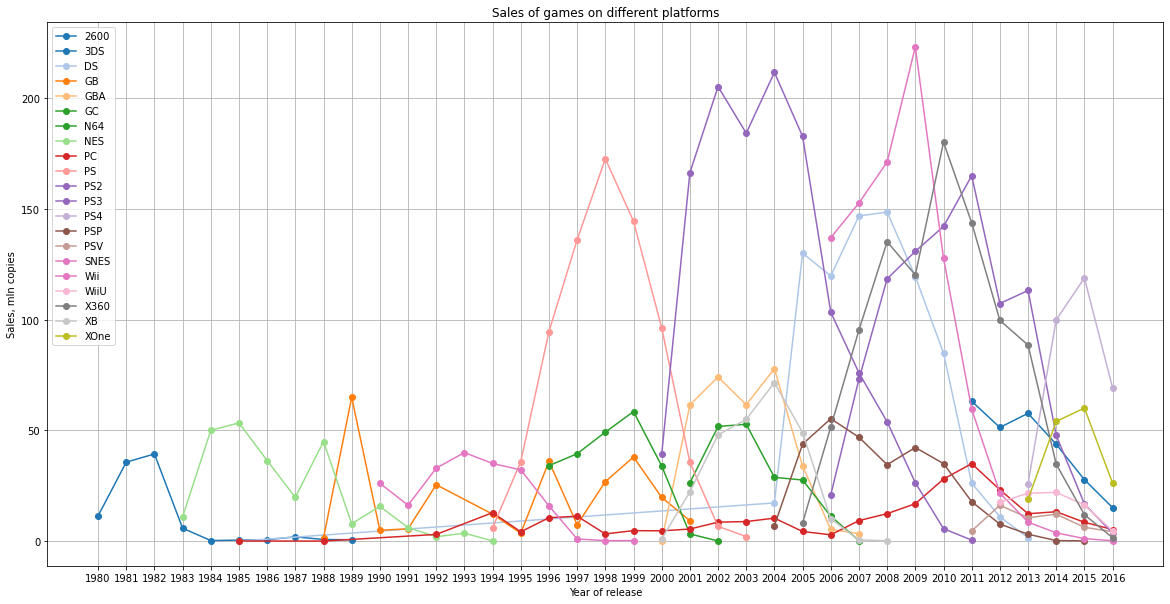

In [11]:
year_stat = data.pivot_table(index = ['year_of_release','platform'], values='total_sales', aggfunc = 'sum').reset_index()
#display(year_stat.query('platform == "DS"'))

#Display graphs of total game sales by platforms and years
def draw_year_stat(year_stat, start, end):
    fig, ax = plt.subplots()
    NUM_COLORS = 25
    cm = plt.get_cmap('tab20')
    ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    for name, platform_stat in year_stat[year_stat.year_of_release >= start].groupby('platform'):
        ax = platform_stat.plot(style='o-', ax=ax, x= 'year_of_release', y='total_sales', grid=True, label = name, figsize = (20,10))
    plt.xlabel('Year of release')
    plt.ylabel('Sales, mln copies')
    plt.title('Sales of games on different platforms')
    plt.xticks(np.arange(start, end, step=1))
    plt.legend()
    plt.show()


draw_year_stat(year_stat, 1980, 2017)
    
    

From the graph, you can see that platforms have a lifespan of approximately 8 years, with the exception of PC. In order not to analyze data on platforms that are out of date at the end of the period, and also given that user preferences may change over time, and our task is still to build forecasts for the next period, it makes sense to discard records older than 2013.

,year_of_release,platform,total_sales
0,2013,3DS,57.76
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99
5,2013,PSP,3.14
6,2013,PSV,10.59
7,2013,Wii,8.59
8,2013,WiiU,21.65
9,2013,X360,88.58


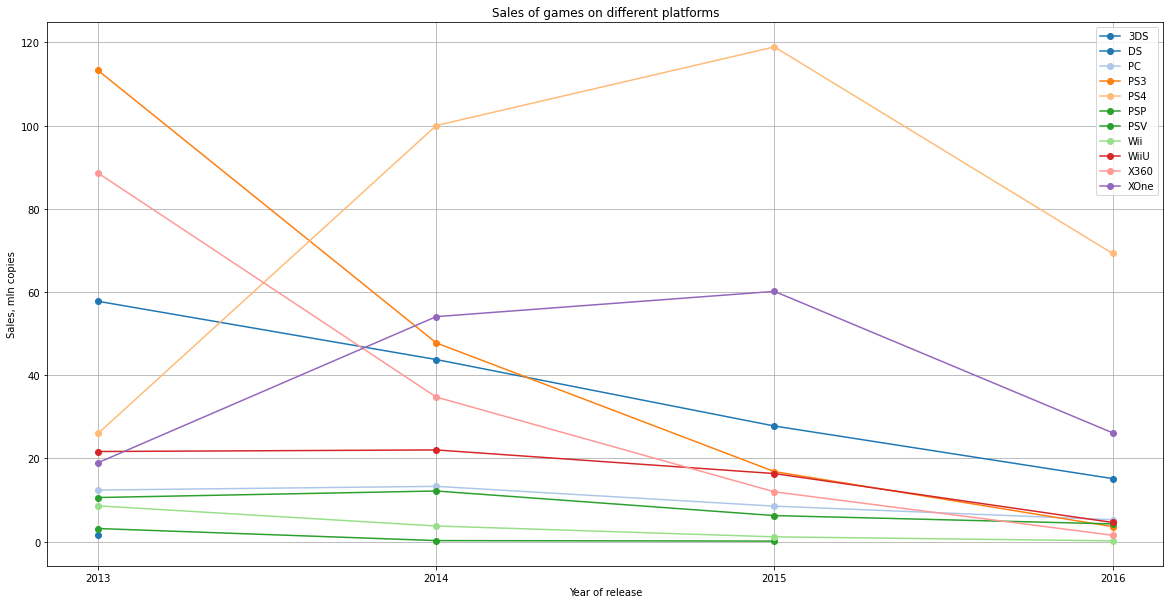

In [12]:
data = data.query('year_of_release >= 2013')
year_stat = data.pivot_table(index = ['year_of_release','platform'], values='total_sales', aggfunc = 'sum').reset_index()
display(year_stat)

draw_year_stat(year_stat, 2013, 2017)



The 3 most popular platforms as of 2016 look like this:
  - Play station 4 (successor to PS3)
  - XBox One (successor to XBox 360)
  - Nintendo 3DS

,amax,mean,median,std,var
platform,,,,,
3DS,14.60,0.46,0.09,1.36,1.86
DS,0.51,0.19,0.15,0.17,0.03
PC,3.05,0.21,0.08,0.35,0.12
PS3,21.05,0.53,0.15,1.45,2.11
PS4,14.63,0.80,0.20,1.61,2.59
PSP,0.24,0.05,0.02,0.06,0.00
PSV,1.96,0.09,0.04,0.15,0.02
Wii,3.58,0.59,0.18,0.92,0.84
WiiU,7.09,0.56,0.20,1.04,1.08


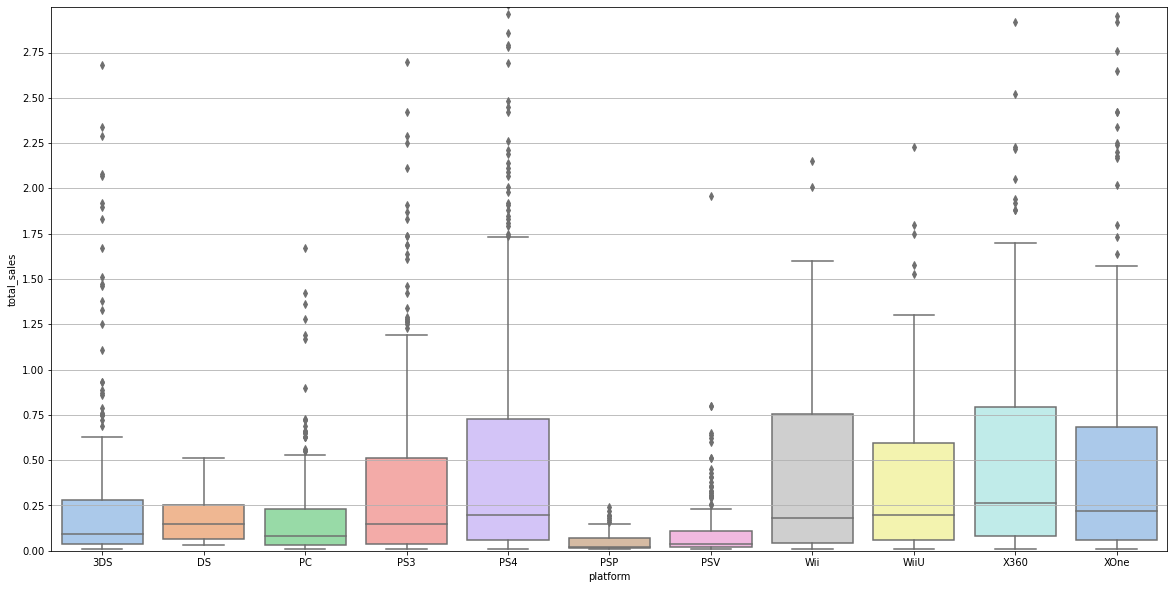

In [13]:
display(data.pivot_table(index='platform', values='total_sales', aggfunc = (np.median, np.mean, np.std, np.var, np.max)))
#display(data.sort_values(by='total_sales', ascending=False).head(5))

#Boxplot for different platforms
def boxplot(platforms=''):
    _, ax = plt.subplots(figsize=(20,10))
    if not platforms:
        plot_data = data.sort_values(by='platform')
    else:   
        plot_data = data.query('platform in @platforms').sort_values(by='platform')

    sns.boxplot(data=plot_data,
                x='platform',
                y='total_sales',
                palette='pastel',
                fliersize = 5,
                ax=ax)
    ax.set_ylim (0,3)
    ax.yaxis.grid(True)
    ax.set_yticks(np.arange(0,3,step=0.25))
    plt.show()

boxplot()


Across all platforms, the distribution of sales is highly skewed to the right, with the median well below average sales: **Most games are small releases, but great games can sell nearly two orders of magnitude more than average games**. The median circulation value of the current PS4 and XOne consoles for 2016 is approximately equal and amounts to 200 thousand copies, but, for example, Call of Duty: Black Ops on PS4 was bought almost 15 million times.

It is also noticeable that ** on portable consoles, such as 3DS, PSV, etc., the circulation both on average and by median is several times more modest ** than on stationary ones.

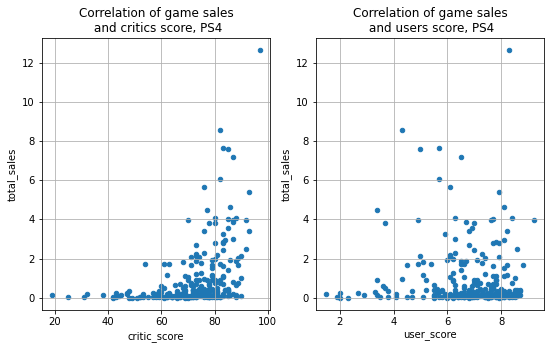

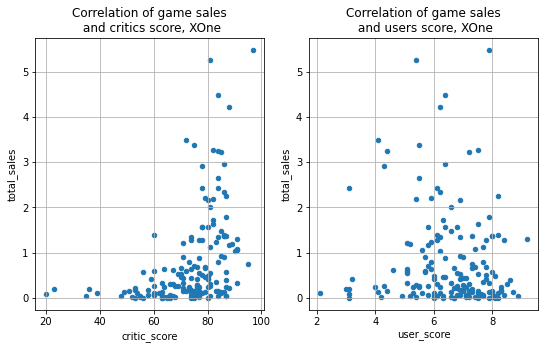

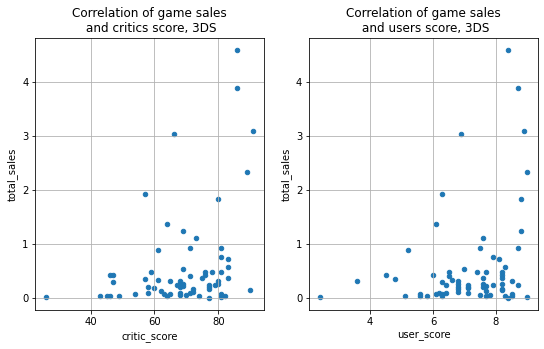

In [14]:
# Build scatterplots between reviews and sales on different platforms
def scatter(platform):
    data_plot = data.query('platform == @platform and user_score >-1 and critic_score >-1')
    _, (ax1, ax2) = plt.subplots(1, 2)
    data_plot.plot(kind='scatter', 
                   x='critic_score', 
                   y='total_sales', 
                   grid=True, 
                   figsize=(9,5),
                   ax=ax1,
                   title='Correlation of game sales\n and critics score, '+platform)
    #print('Corr coefficient:', data_plot.total_sales.corr(data.critic_score))

    data_plot.plot(kind='scatter', 
                   x='user_score', 
                   y='total_sales', 
                   grid=True, 
                   figsize=(9,5), 
                   ax=ax2,
                   title='Correlation of game sales\n and users score, '+platform)
    plt.show()
    #print('Коэффициент корреляции:', data_plot.total_sales.corr(data.user_score))
    
scatter('PS4')
scatter('XOne')
scatter('3DS')

Let's look at **correlation of parameters** for different platforms

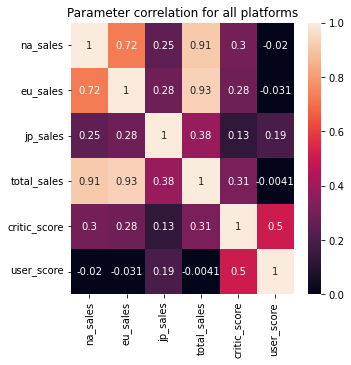

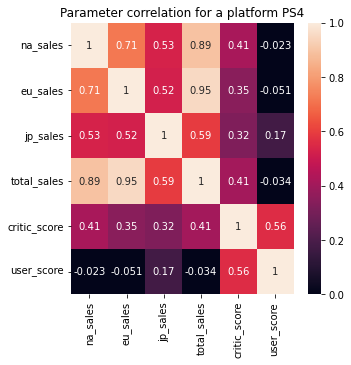

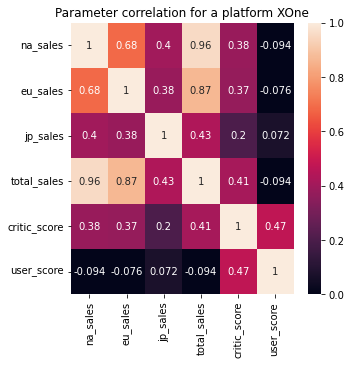

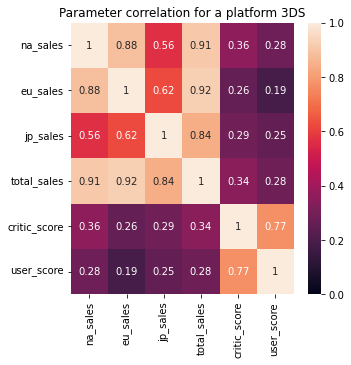

In [15]:
#Display heat maps for parameters correlattion
def corr_heatmap(platform =''):
    if not platform:
        plot_data = data[['na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'critic_score', 'user_score', 'platform']]\
        .query('user_score >-1 and critic_score >-1')
        title = 'Parameter correlation for all platforms'
    else:
        plot_data = data[['na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'critic_score', 'user_score', 'platform']]\
        .query('user_score >-1 and critic_score >-1 and platform == @platform')
        title = 'Parameter correlation for a platform '+platform

    _, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(plot_data.corr(), annot=True, ax=ax, vmin=0, vmax=1)
    ax.set_title(title)
    plt.show()

corr_heatmap()
corr_heatmap('PS4')
corr_heatmap('XOne')
corr_heatmap('3DS')

Within the limits of available rating data (about half of the games are missing), it can be seen that:
- **Sales on all popular consoles have an average correlation with critic scores**, although top drawers tend to score 80 or higher.
- Oddly enough, games on **PS4 and XBox One don't show any correlation between sales and user ratings**, but Nintendo 3DS does.

/var/folders/s6/br1850nj7v1034jkkmhypzg80000gn/T/ipykernel_11557/3541152468.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\


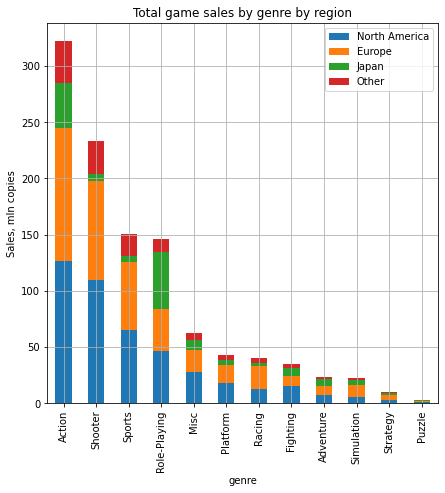

/var/folders/s6/br1850nj7v1034jkkmhypzg80000gn/T/ipykernel_11557/3541152468.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\


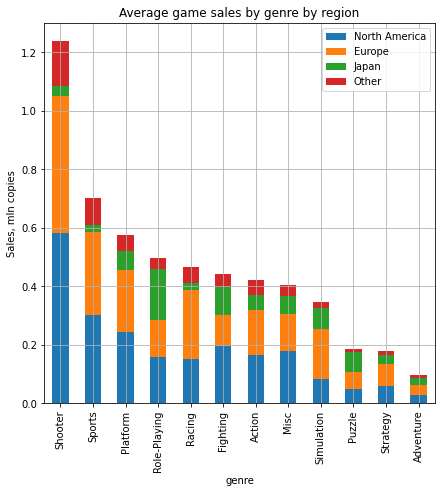

In [16]:
#Overall distribution of games per genre

#Total sales
genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\
.sum().sort_values(by='total_sales', ascending=False).reset_index()
genre_sales.drop('total_sales', axis=1, inplace=True)

ax=genre_sales.plot(kind='bar',
                 x = 'genre',
                 stacked = True,
                 grid=True,
                 figsize=(7,7), 
                 title = 'Total game sales by genre by region')
plt.legend(["North America", "Europe", "Japan", 'Other'])
ax.set_ylabel('Sales, mln copies')
plt.show()

#Average sales
genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\
.mean().sort_values(by='total_sales', ascending=False).reset_index()
genre_sales.drop('total_sales', axis=1, inplace=True)

ax=genre_sales.plot(kind='bar',
                 x = 'genre',
                 stacked = True,
                 grid=True,
                 figsize=(7,7), 
                 title = 'Average game sales by genre by region')
plt.legend(["North America", "Europe", "Japan", 'Other'])
ax.set_ylabel('Sales, mln copies')
plt.show()


### Conclusion

1. Although, according to the data we have at our disposal, sales in zero years significantly exceeded sales in 2010s, we excluded data older than 2013 from the analysis in order not to take into account irrelevant platforms and trends. The lifetime of the platforms during the period under consideration was quite significant and reached 8-10 years. The 3 most popular platforms as of 2016 look like this:
 - Play station 4 (successor to PS3)
 - XBox One (successor to XBox 360)
 - Nintendo 3DS***
2. Most of the games are released in a small circulation, but the sales of truly popular ones can exceed the sales of the average ones by almost two orders of magnitude. The median circulation value of the current PS4 and XOne consoles for 2016 is approximately equal and amounts to 200 thousand copies, but, for example, Call of Duty: Black Ops on PS4 was bought almost 15 million times. On portable consoles, such as 3DS and PSV, the circulation both on average and on the median is almost 2 times lower.
3. Sales on all popular consoles have an average correlation with critical ratings, although top drawers tend to score 80 or higher. At the same time, there is almost no dependence of sales on user rating.
4. The most sold games in the world are the following genres: Action, Shooter, Sports, RFG and Platform. At the same time, the first two genres owe sales mainly to Europe and North America, while in Japan RPG leads in total sales, and Action follows it. If you look at the average sales per game, then in Europe and America in the top 5 instead of RPG, Racing is knocked out, and in Japan the leaders are: RPG, Fighting, Platform and Puzzle. This can be explained by the fact that there are much more games in the Shooter and Action genres in general, and therefore, in total sales, they leave many far behind. But among those games that diverge in the largest circulation, role-playing, fighting and platforms are in the lead in Japan.

## User portrait by region

###  Sales by genre and region

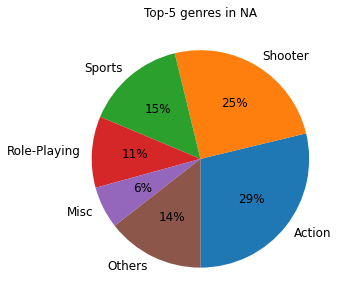

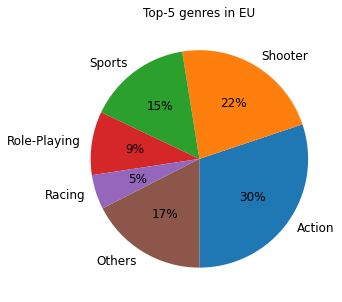

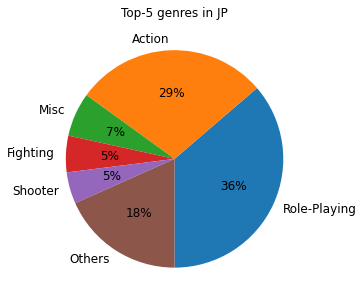

In [17]:
#Let's build sales charts by genres and platforms by region

def sales_piechart(index, column):
    plot_data = data.groupby(index)[column].sum().sort_values(ascending=False).reset_index()
    plot_data_top = plot_data[:5].copy()
    others_sum = plot_data[column][5:].sum(axis=0)
    new_row = pd.DataFrame([['Others', others_sum]], columns = plot_data.columns)
    plot_data_top = pd.concat([plot_data_top, new_row], sort=True, ignore_index=True)
    ax = plot_data_top.plot(kind='pie',
                            grid=True, 
                            figsize=(5,5),
                            y=column,
                            labels=plot_data_top[index],
                            autopct='%1.0f%%', 
                            startangle=270, 
                            fontsize=12, 
                            legend=None,
                            title = 'Top-5 '+index+'s in '+(column[:2]).upper())
    ax.yaxis.set_visible(False)
    plt.show()
    
sales_piechart('genre', 'na_sales')
sales_piechart('genre', 'eu_sales')
sales_piechart('genre', 'jp_sales')


In North America and Europe, Action and Shooter games dominate the sales, followed by sports games.
In Japan, RPGs lead by a wide margin, followed by the Action genre.

### Sales by platform and region

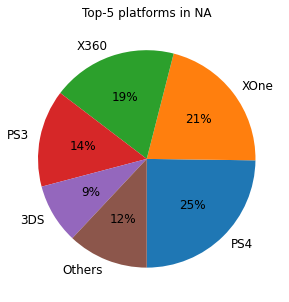

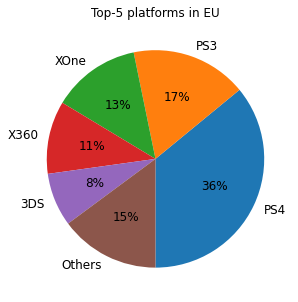

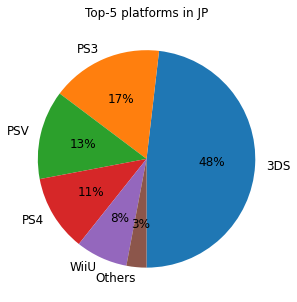

In [18]:
#Construct sales charts by platform by region
sales_piechart('platform', 'na_sales')
sales_piechart('platform', 'eu_sales')
sales_piechart('platform', 'jp_sales')

In North America, games on the Play Station 4 lead in sales, followed by the XBox One and XBox 360 by a narrow margin. In total, the shares of PS4 + PS3 and XBox are approximately equal.
In Europe, the PS4 leads by a wide margin, while the position of the XBox platforms is much weaker than in North America.
In Japan, the undisputed leader is the portable platform Nintendo 3DS with a 50% share. The PS3 and PS4 consoles take about 30% in total, and there are no Microsoft platforms in the top 5.

### Impact of ESRB rating on regional sales

In [19]:
#Correlation of ESRB and sales
def scatter_esrb(region):
    data.plot(kind='scatter', 
                   x='rating', 
                   y=region, 
                   grid=True, 
                   figsize=(9,9), 
                   title='Correlation of sales and rating, '+region)
    plt.show()

#scatter_esrb('na_sales')
data['rating'].value_counts()
#data[data.rating.isna()].head(300)

N/A     980
M       369
T       335
E       304
E10+    254
Name: rating, dtype: int64

/var/folders/s6/br1850nj7v1034jkkmhypzg80000gn/T/ipykernel_11557/3719331275.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = data.groupby('rating')['na_sales','eu_sales','jp_sales'].sum().plot(kind='bar',


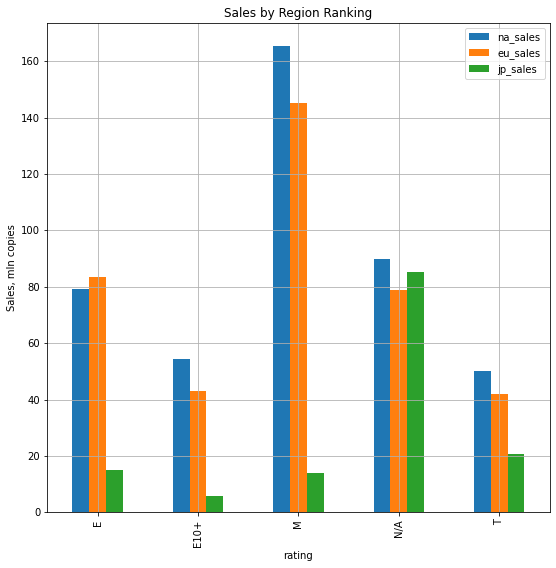

In [20]:
#Let's build sales charts by region in the context of the ESRB rating

ax = data.groupby('rating')['na_sales','eu_sales','jp_sales'].sum().plot(kind='bar', 
                                                              grid=True, 
                                                              figsize=(9,9), title = 'Sales by Region Ranking')
ax.set_ylabel('Sales, mln copies')
ax.legend()
plt.show() 

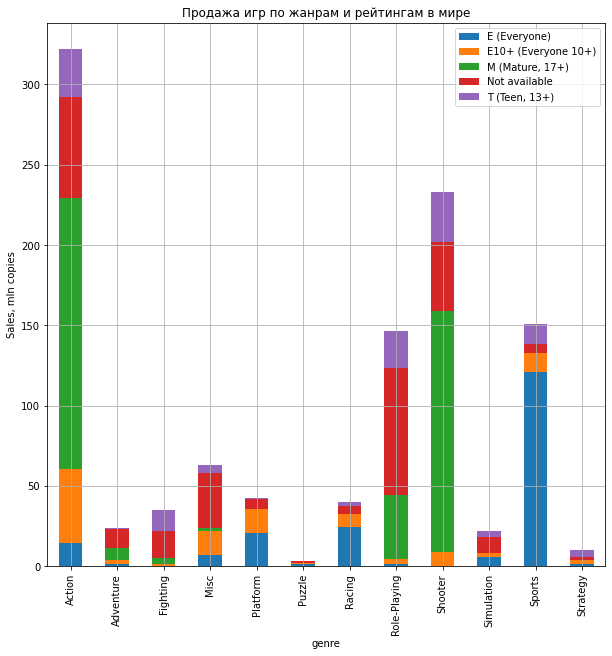

In [21]:
#Построим диаграмму с долей продаж рейтингов внутри каждого жанра
genre_rating_sales = data.pivot_table(index='genre', columns='rating', values='total_sales', aggfunc='sum').reset_index()
ax = genre_rating_sales.plot(kind='bar', 
                        x = 'genre',
                        stacked='True',
                        grid=True,
                        figsize = (10,10),
                        title = 'Продажа игр по жанрам и рейтингам в мире')
plt.legend(["E (Everyone)", "E10+ (Everyone 10+)", "M (Mature, 17+)", "Not available", "T (Teen, 13+)"])
ax.set_ylabel('Sales, mln copies')
plt.show()
    

As seen in the "Sales by Region Rating" chart, **Europe and North America have the highest sales of games rated M (17+)**. If you look at the Action and Shooter genres that are in the highest demand in the same regions, M-rated games also dominate within them. It's hard to say what comes first when choosing a game - genre or rating.
In Japan, the largest share of sales (after N / A, that is, an indefinite rating) belongs to games of category T (13+). While the category T is not dominant in the most popular genres in Japan (RPG and Action). Here it is safer to say that **In Japan, games for teenagers under 17 are more popular.**

### Conclusion

1. In North America and Europe, Action and Shooter games are the top sellers, followed by sports games. In Japan, RPGs lead by a wide margin, followed by the Action genre.
2. In North America, games on the Play Station 4 are leading, followed by XBox One and XBox 360 by a narrow margin. In Europe, PS4 leads by a wide margin, while the position of the XBox platforms is much weaker than in America. In Japan, the undisputed leader is the portable platform Nintendo 3DS with a 50% share.
3. In Europe and North America, games rated M (17+) have the highest sales. This is quite consistent with the most popular Action and Shooter genres there. In Japan, the most popular games are for teenagers under 17 years old.

## Hipothesis test

Let's check the following statements:

1. The average user ratings of the Xbox One and PC platforms are the same. Since we are comparing the mean of the samples from two different platforms, then:
    - For the null hypothesis, we will assume that the average user ratings of the Xbox One and PC platforms are the same.
    - Alternative hypothesis: Average user ratings of Xbox One and PC platforms are different
2. The average user ratings of the Action and Sports genres are different. In this case, as usual, for the null hypothesis we must take that the ratings are the same, and for the alternative - that they are different. If we reject the null hypothesis, then the alternative is confirmed (not rejected)
    - Null hypothesis: The average user ratings of Action and Sports genres are the same
    - Alternative hypothesis: The average user ratings of the Action and Sports genres are different
    
As a criterion for testing null hypotheses, we take the criterion p-value < level of statistical significance.

### Average user ratings for Xbox One and PC platforms

Let's construct the distributions of samples of user ratings across the XBox One and PC platforms and compare the mean and variance.

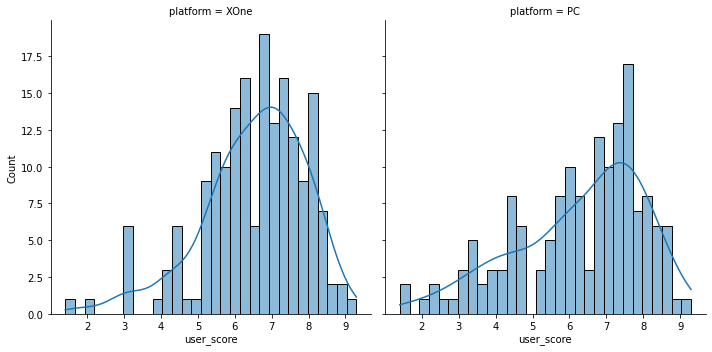

,mean,var
platform,,
3DS,6.93,2.38
DS,4.80,NaN
PC,6.27,3.04
PS3,6.35,3.23
PS4,6.75,2.13
PSP,5.85,11.98
PSV,7.53,1.73
Wii,5.26,3.59
WiiU,7.02,1.98


In [26]:
#Draw histoghram
plot_data = data.query('user_score > 0 and platform in ("XOne", "PC")')
sns.displot(data=plot_data, 
            x='user_score',
            col='platform',
            bins=30, 
            kde=True
           )
plt.show()
#Define mean and variance
display(data.pivot_table(index='platform', values='user_score', aggfunc = (np.mean, np.var)))

The distributions are similar to skew normal distributions.
Average user rating for PC = 6.27, for XOne = 6.52. When testing a hypothesis, we will just check whether this difference is not accidental and whether it really says something.

Because Since the sample variances for PC and XOne are very different, then when testing the samples, we will take _equal_var=False_.
Samples for different genres and platforms can be viewed as independent samples from different populations. Therefore, to compare them, we use the scipy.stats.ttest_ind method.

In [27]:
#Let's test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same
#Remove the technical values -1 and -2 from the set
data = data[data.user_score > 0]

alpha = 0.05
results = st.ttest_ind(data[data.platform == 'XOne'].user_score, data[data.platform == 'PC'].user_score, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the hypothesis that the average user ratings of the Xbox One and PC platforms are the same")
else:
    print("Failed to reject the hypothesis that the average user ratings of the Xbox One and PC platforms are the same")

p-value: 0.14414956265829446
Failed to reject the hypothesis that the average user ratings of the Xbox One and PC platforms are the same


### Average user ratings for Action and Sports genres

Let's construct the distributions of samples of user ratings by Action and Sports genres and compare the means and variance.

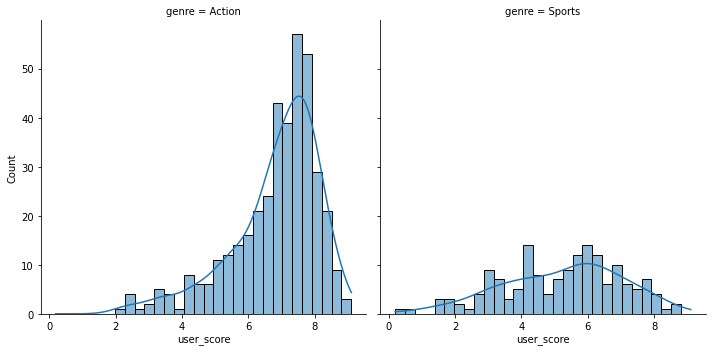

,mean,var
genre,,
Action,6.84,1.76
Adventure,7.41,1.83
Fighting,7.04,1.92
Misc,6.98,1.41
Platform,6.71,2.89
Puzzle,7.47,0.89
Racing,6.08,2.99
Role-Playing,7.38,1.48
Shooter,6.34,2.15


In [24]:
#Draw histogram
plot_data = data.query('user_score > -1 and genre in ("Action", "Sports")')
sns.displot(data=plot_data, 
            x='user_score',
            col='genre',
            bins=30, 
            kde=True
           )
plt.show()
#Define variance and mean
display(data.pivot_table(index='genre', values='user_score', aggfunc = (np.mean, np.var)))

The distributions are similar to skew normal distributions.
Average user rating for Action = 6.84, for Sports = 5.24. When testing the hypothesis, we will check whether this difference is not accidental and whether they really differ.

Because Since the samples have different variances, then when testing we will take _equal_var=False_.
Samples for different genres can be considered as independent samples from different populations. Therefore, to compare them, we use the scipy.stats.ttest_ind method.

In [25]:
#Let's test the hypothesis that the average user ratings of Action genres
# and Sports are different.
#Null hypothesis: the average ratings of the two genres are the same

alpha = 0.05
results = st.ttest_ind(data[data.genre == 'Action'].user_score, data[data.genre == 'Sports'].user_score, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the hypothesis that the average user ratings of the Action and Sports genres are the same")
else:
    print("Failed to reject the hypothesis that the average user ratings of the Action and Sports genres are the same")

p-value: 1.5461711636643233e-20
We reject the hypothesis that the average user ratings of the Action and Sports genres are the same


### Conclusion

Hypothesis testing result:

**1. The average user ratings of the Xbox One and PC platforms are the same.**

**2. The average user ratings for the Action and Sports genres are different. The Action genre has a higher average rating.**